In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

Text(0, 0.5, 'Proportion Correct')

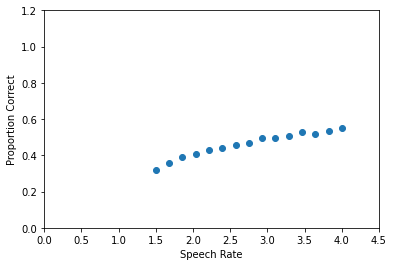

In [7]:
nReps = 1000    # Number of replications
listLength = 5  # Number of list items
initAct = 1     # Initial Activation of items
decRate = 0.25      # Decay Rate
decSD = 0.05
delay = 5       # Retention Interval
minAct = 0.01    # Minimum activation of Recall

rRange = np.linspace(1.5,4,15)
# array([1.5       , 1.67857143, 1.85714286, 2.03571429, 2.21428571,
#        2.39285714, 2.57142857, 2.75      , 2.92857143, 3.10714286,
#        3.28571429, 3.46428571, 3.64285714, 3.82142857, 4.        ])

tRange = 1.0/rRange
# array([0.66666667, 0.59574468, 0.53846154, 0.49122807, 0.4516129 ,
#        0.41791045, 0.38888889, 0.36363636, 0.34146341, 0.32183908,
#        0.30434783, 0.28865979, 0.2745098 , 0.26168224, 0.25      ])

pCor = np.zeros(len(rRange))
# [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

i = 0

for tPerWord in tRange:
    # minAct = 0.5*tPerWord

    for rep in range(nReps):

        actVals = (np.ones(1)*initAct)
        # actVals = [1.0]

        dRate = decRate + (np.random.standard_normal() * decSD)

        for x in range(listLength-1):
            actVals = actVals - (dRate*math.exp(tPerWord))
            actVals = np.append(actVals,[1.0])

        cT = 0
        itemReh = 0

        while cT<delay:
            intact = (np.where(actVals>minAct))[0]+1
            # intact = [1, 2, 3, 4, 5]
            
            # Find the next item still accessible
            try:
                itemReh = intact[np.where(intact>itemReh)[0]][0]
            except:
                itemReh = 1
                    
            actVals[itemReh-1] = initAct
           
            actVals = actVals - (dRate*math.exp(tPerWord)) # Time Decay
            cT = cT+tPerWord
            
        pCor[i] = pCor[i] +  (len(np.where(actVals>minAct)[0]) / listLength) ; 
        
    i+=1

plt.scatter(rRange,pCor/nReps)
plt.xlim([0, 4.5])
plt.ylim([0, 1.2])
plt.xlabel('Speech Rate')
plt.ylabel('Proportion Correct')